In [ ]:
%cd /content
! rm -rf gan-tools
!git clone --single-branch --depth=1 --branch master https://github.com/hannesdm/gan-tools.git
%cd gan-tools
from keras.datasets import mnist
import impl
from impl import *
from core import vis
from core import gan
from core import constraint
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False


/content
Cloning into 'gan-tools'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.
/content/gan-tools


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## Load the cifar10 data
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.  <br/>
**Exercise** We will select a single class of this dataset to model. This can be done by setting the **model_class** variable to the corresponding class. <br/>
One cell lower, a few images of the selected class are shown.

In [ ]:
model_class = 1
(X_train_original, Y_train), (_, _) = cifar10.load_data()
X_train_single_class = X_train_original[np.where(np.squeeze(Y_train) == model_class)]
X_train = X_train_single_class / 127.5 - 1.

170500096/170498071 [==============================] - 13s 0us/step


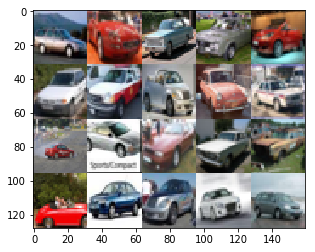

In [ ]:
grid = vis.image_grid(X_train_single_class[0:20], 5)
plt.imshow(grid)

## Train the DCGAN
<img src="https://i.imgur.com/NFUiEf5.png" width="450"> <br/>
The following code will train a GAN with a working DCGAN architecture. This training can be controlled by the following parameters:


*   **batches**: The number of batches the GAN should train on.
*   **batch_size**: The size of each batch.
*    **plot_interval**: After how many batches the generator should be sampled and the images shown.

The default parameters may be kept. <br/>
Make sure to train the GAN for a sufficient amount of time in order to see realistic samples. At any point, the training may be stopped by clicking on the stop button or on 'interrupt execution' in the runtime menu at the top of the page.<br/> In the same menu, the runtime type may also be changed to 'GPU'. This will speed up the training of the models. <br/>
**Exercise** Comment on the loss and accuracy of the generator and discriminator, shown during training and discuss its stability.





In [ ]:
gan = cifar10_dcgan()
gan.train_random_batches(X_train, batches = 20000, batch_size=32, plot_interval = 50)
vis.show_gan_image_predictions(gan, 32)

In [ ]:
D_loss
"""
acc = gan.history['D acc']
epochs = range(20000)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, acc, 'g', label='Training accuracy')
#plt.plot(epochs, val_acc, 'k', label='Validation accuracy')
plt.title('Training loss')
plt.legend()
plt.show()
"""

NameError: ignored

## Stability in GANs
Sadly, training a GAN is not always this easy. <br/>
Stability during training is important for both discriminator and generator to learn. <br/>
Below is a short video (50s) showing the intermediate results of a GAN being trained on mnist. The final result is a phenomenon known as 'mode collapse'. <br/>
<img src='https://i.imgur.com/lG35xDP.gif'>
